<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/EDA/Labo_EDA_BUENO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Laboratorio EDA
Para realizar este Laboratorio, utilizaremos un conjunto de datos sobre salud y estilo de vida, que contiene información detallada sobre hábitos de sueño, datos demográficos, ocupación, actividad física, niveles de estrés y síntomas de alteraciones del sueño.


In [ ]:
# importamos librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
#Leemos el fichero de datos
df=pd.read_csv('https://drive.google.com/uc?id=1YiDS_GmSUb6-03KJkEOfClZkvXQPKMRF')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## 1.- Análisis  básico





In [ ]:
# 1.- Obtener una visión en conjunto de los datos
df.describe()


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [ ]:
# 2.- Cuántas filas y columnas tenemos?
df.shape

(374, 13)

In [ ]:
# 3.- Qué tipo de dato corresponde a cada columna?
# Qué columnas son nunéricas y cuáles categóricas ?
df.dtypes
df.info()
#! Gender and sleep are categorical variables, the rest are numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
# 4  Existen valores duplicados ? Si es así eliminarlos
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.shape


(374, 13)

In [ ]:
# 5 Existen valores nulos? si es así, reemplazar la columna que los tiene
# por una nueva en la que  esos valores se reemplacen por  'No Sleep Disorder'
df.isnull().sum()
df['Sleep Disorder'].fillna('No Sleep Disorder', inplace=True)
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

## 2.- Análisis Exploratorio  
En esta sección, exploraremos las relaciones entre la duración del sueño, la actividad física, los niveles de estrés y la calidad del sueño. Presentaremos cuadros y gráficos visualmente atractivos para resaltar estas relaciones.

<Axes: xlabel='Sleep Duration', ylabel='Quality of Sleep'>

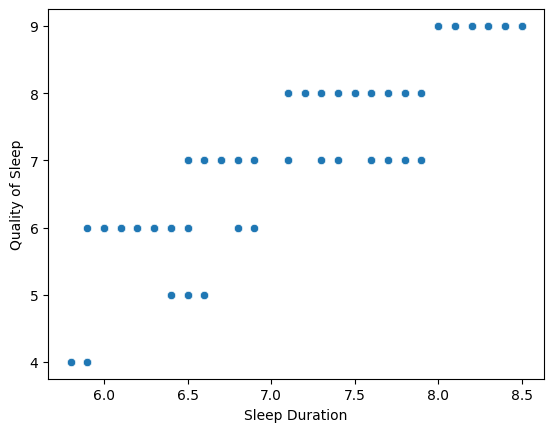

In [ ]:
# 6  Existe correlación entre  las variables "sleep duration" y "sleep quality" ?
# Si existe cuál es el valor de esta correlación ?
# Si existe hagamos un gráfico de puntos entre las variables para ver la tendencia
# Que conclusión podemos obtener de esta información ?
df[['Sleep Duration','Quality of Sleep']].corr()
#! There is a correlation of 0.883213 between the two variables
sns.scatterplot(x='Sleep Duration', y='Quality of Sleep', data=df)
#! There is a positive correlation between the two variables, the more sleep duration, the better the quality of sleep

<Axes: xlabel='Physical Activity Level', ylabel='Quality of Sleep'>

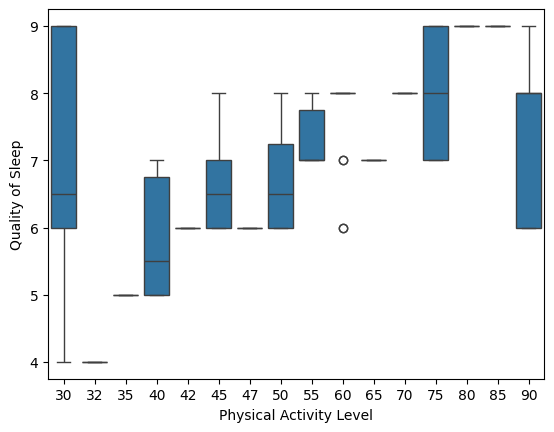

In [ ]:
# 7 Hagamos un diagrama de cajas para ver la relación entre "Physical Activity" y "Sleep Quality"
# Quñe conclusión podemos obtener de este gráfico ?
sns.boxplot(x='Physical Activity Level', y='Quality of Sleep', data=df)
#! There is a tendency to have a better quality of sleep when the physical activity level is higher

<Axes: xlabel='Stress Level', ylabel='Quality of Sleep'>

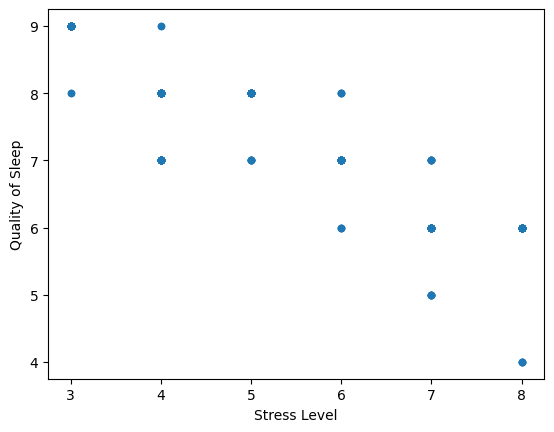

In [ ]:
# 8 Existe correlación entre  las variables "stress levels" y "sleep quality" ?
# Si existe cuál es el valor de esta correlación ?
# Si existe hagamos un gráfico de puntos entre las variables para ver la tendencia
# Que conclusión podemos obtener de esta información ?
df[['Stress Level','Quality of Sleep']].corr()
#! There is a correlation of -0.898752 between the two variables
df.plot.scatter(x='Stress Level', y='Quality of Sleep')
#! There is a negative correlation between the two variables, the more stress level, the worse the quality of sleep

In [ ]:
# 9 Cuál es la media de sueño en el conjunto de datos?
# Cuál es la media de sueño para hombres ?
# Cuál es la media de sueño para mujeres ?
df['Sleep Duration'].mean()
#! The mean of the sleep duration is 7.132085561497325
df


7.132085561497325

<Axes: xlabel='Sleep Duration', ylabel='Occupation'>

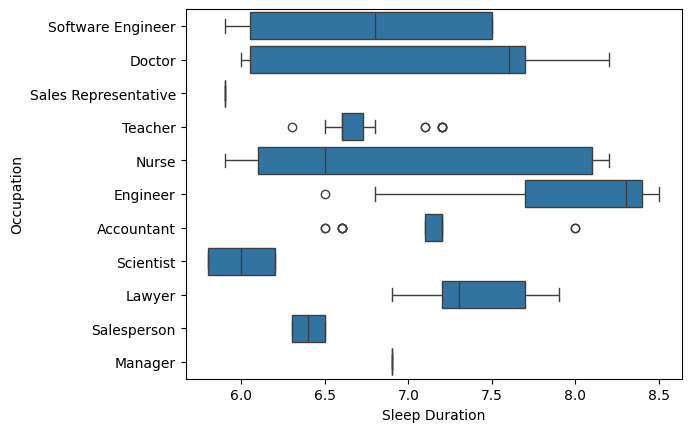

In [ ]:
# 10 Hagamos un diagrama de cajas para ver la relación entre "Occupation" y "Sleep Duration"
# Qué tipo de profesionales duermen más y cuáles menos ?

sns.boxplot(y='Occupation', x='Sleep Duration', data=df)
#! Engeneers and Lawyers sleep more than the rest of the occupations

<Axes: xlabel='Quality of Sleep', ylabel='Occupation'>

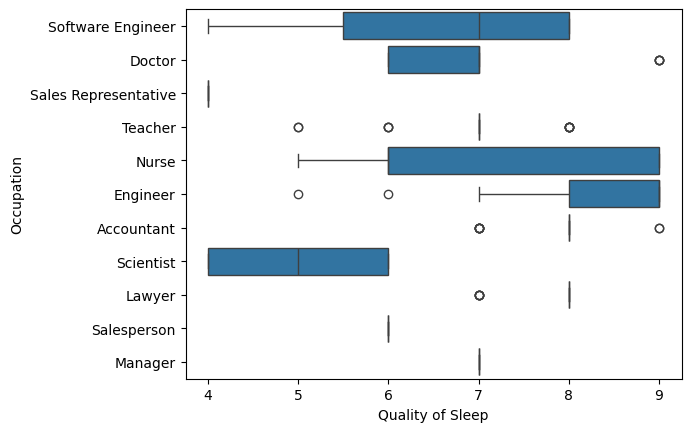

In [ ]:
# 11 Lo mismo que antes pero con las variables "Occupation" y "Sleep Quality"
# Que tipo de profesionales duermen mejor ?
sns.boxplot(y='Occupation', x='Quality of Sleep', data=df)
#! Engeneers and Nurses sleep better than the rest of the occupations

<Axes: >

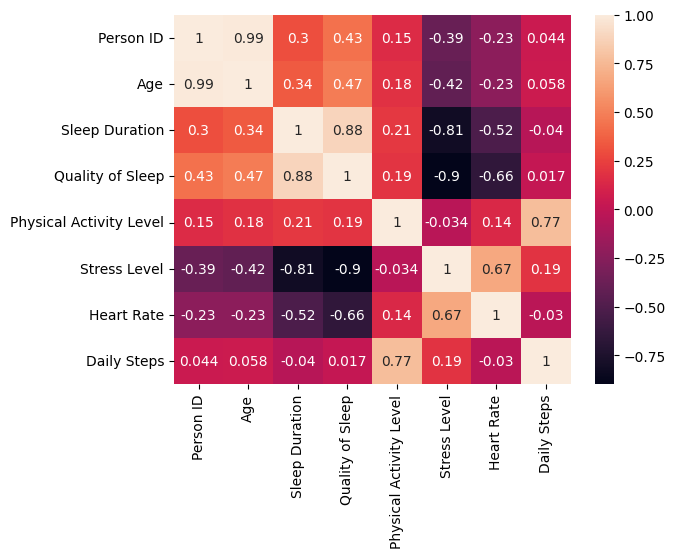

In [ ]:
# 12 Obtengamos la matriz de correlaciones entre todas las variables numéricas del conjunto de datos
# Graficar el mapa de calor con estos valores
numeric_df = df.select_dtypes(include=np.number)
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True)


## Extra

<Axes: >

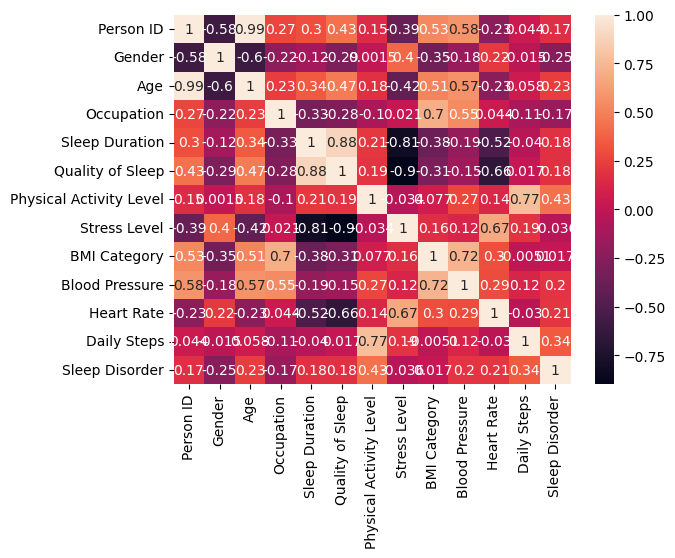

In [ ]:
# Modificar las columnas ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']
# para que tengan valores numéricos y no categóricos
# Consultar LabelEncoder() de sklearn
# Obtener la matriz de correlaciones de todas las variables del conjunto
# graficar la matriz con el mapa de calor-
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
columns_to_encode = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']
for column in columns_to_encode:
    df[column] = encoder.fit_transform(df[column])
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)